<a href="https://colab.research.google.com/github/ManjunathD620/Google_QuickDraw/blob/main/Sketch_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ndjson
!mkdir data_sets
!pip install keras_tuner

from urllib.request import urlretrieve
import ndjson
import os
import random

from PIL import Image,ImageDraw,ImageOps
import numpy as np
import cv2
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

     |████████████████████████████████| 98 kB 5.1 MB/s 


In [ ]:
def crop_image(img):
  width,height = img.size
  pixel = img.load()
  rows =[]
  cols =[]

  for i in range(width):
    for j in range(height):
      if(pixel[i,j][2]>0):
        rows.append(j)
        cols.append(i)

  row_min = np.array(rows).min()
  row_max = np.array(rows).max()
  col_min = np.array(cols).min()
  col_max = np.array(cols).max()

  border = (col_min,row_min,width-col_max,height-row_max)
  
  newImage = ImageOps.crop(img,border)
  return newImage

In [ ]:
ff = open("/content/Quick draw set link.txt")
classes = ff.readlines()
classes = classes[:20]

all_images = []
all_labels = []

waste = 0
class_index = 0
total_images_from_set = 20000

for file_name in classes:
  print(class_index+1,file_name[:-9])
  name = "%20".join(file_name.split(' '))
  name = name[3:-4]
  urlretrieve(f"https://storage.googleapis.com/quickdraw_dataset/full/simplified/{name}",f"/content/data_sets/{file_name}")  
  
  with open(f"/content/data_sets/{file_name}") as f:
    raw = ndjson.load(f)
    
    valid = 0

    for raw_img in raw:
      stroke = []
      if(raw_img["recognized"] == True):
        stroke_lines = raw_img["drawing"]
        for j in range(len(stroke_lines)):
          for i in range(len(stroke_lines[j][0])):
            stroke.append((stroke_lines[j][0][i],stroke_lines[j][1][i]))
        simplifiedImage = Image.new("RGB",(256,256))
        draw = ImageDraw.Draw(simplifiedImage)
        draw.line(stroke,fill="white",width = 16)
        img1 = crop_image(simplifiedImage)
        img1 = cv2.resize(np.array(img1),(28,28), interpolation= cv2.INTER_AREA)
        out = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)

        all_images.append(out)
        all_labels.append(class_index)
        valid+=1

        if(valid == 1000 or valid == 5000 or valid == 10000 or valid == 15000 or valid == 19000):
          print("  ",valid)

        elif(valid==total_images_from_set):
          break

      else:
        waste +=1
  os.remove(f"/content/data_sets/{file_name}")

  class_index +=1

data = [all_images,all_labels]
data = np.asarray(data)
np.save("/content/drive/MyDrive/data.npy",data)

1  The Eiffel Tower
   1000
   5000
   10000
   15000
   19000
2  airplane
   1000
   5000
   10000
   15000
   19000
3  apple
   1000
   5000
   10000
   15000
   19000
4  axe
   1000
   5000
   10000
   15000
   19000
5  backpack
   1000
   5000
   10000
   15000
   19000
6  banana
   1000
   5000
   10000
   15000
   19000
7  bench
   1000
   5000
   10000
   15000
   19000
8  bicycle
   1000
   5000
   10000
   15000
   19000
9  birthday cake
   1000
   5000
   10000
   15000
   19000
10  book
   1000
   5000
   10000
   15000
   19000
11  bucket
   1000
   5000
   10000
   15000
   19000
12  calendar
   1000
   5000
   10000
   15000
   19000
13  lollipop
   1000
   5000
   10000
   15000
   19000
14  camera
   1000
   5000
   10000
   15000
   19000
15  candle
   1000
   5000
   10000
   15000
   19000
16  car
   1000
   5000
   10000
   15000
   19000
17  clock
   1000
   5000
   10000
   15000
   19000
18  donut
   1000
   5000
   10000
   15000
   19000
19  eye
   1000
   5000

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
print(waste)

22857


In [ ]:
d = np.load("/content/drive/MyDrive/data.npy",allow_pickle=True)

showImages = []
showLabels = []

select = [(x*20000) for x in range(21)]

for i in range(len(select)-1):
  choose = random.randint(select[i],(select[i+1]-1))
  showImages.append(d[0][choose])
  showLabels.append(d[1][choose])

In [ ]:
ff = open("/content/drive/MyDrive/Quick draw set link.txt")
classes = ff.readlines()
classes = classes[:20]

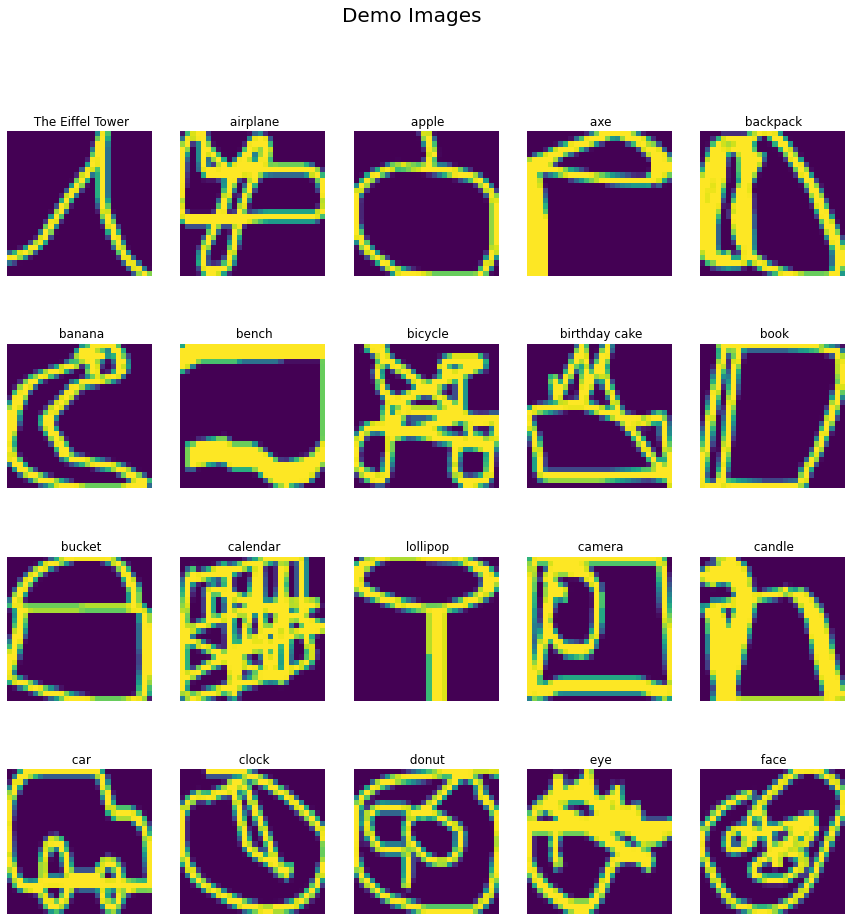

In [ ]:
fig = plt.figure(figsize=(15,15))

fig.suptitle('Demo Images', fontsize=20)
fig.tight_layout()

for i in range(20):
  fig.add_subplot(4,5,i+1)
  plt.axis("off")
  plt.title(classes[showLabels[i]][:-9])
  plt.imshow(showImages[i])

In [ ]:
data = np.load("/content/drive/MyDrive/data.npy",allow_pickle=True)

x = data[0]
x_split = []

for i in x:
  x_split.append(i.astype("float32")/255.0)

x_split = np.asarray(x_split)
y_split = to_categorical(data[1])

x_train , x_test , y_train , y_test = train_test_split(x_split,y_split, train_size=0.75,test_size=0.25, random_state=10)

In [ ]:
x_test.shape

(100000, 28, 28)

In [ ]:
x_train = x_train.reshape(len(x_train),28,28,1)
x_test = x_test.reshape(len(x_test),28,28,1)

In [ ]:
from tensorflow.keras import models,layers
from tensorflow import keras

def build_model(hp):
  model = models.Sequential()
  model.add(layers.Conv2D(filters=hp.Choice("conv_1",values=[300,450,600]),
                          kernel_size=hp.Choice("kernel_1",values = [3,5]),
                          activation = "relu",
                          input_shape = (28,28,1)))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(filters=hp.Choice("conv_2",values=[300,350,400]),
                          kernel_size=hp.Choice("kernel_2",values = [3,5]),
                          activation="relu"))
  model.add(layers.MaxPooling2D((2,2)))

  model.add(layers.Flatten())
  model.add(layers.Dense(units=hp.Choice("dense",values = [500,600,700]),
        activation='relu'))
  model.add(layers.Dense(20,activation="softmax"))

  speed = hp.Choice("learning_rate",values=[1e-2, 1e-3])

  model.compile(optimizer = keras.optimizers.Adam(learning_rate=speed),
                loss = keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
  
  return model

In [ ]:
import keras_tuner as kt

tunner = kt.Hyperband(build_model,
                      objective="val_accuracy",
                      max_epochs=5,
                      factor=2,
                      directory='output',
                      project_name='Quick draw')

In [ ]:
import tensorflow as tf
stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
tunner.search(x_train[:60000], y_train[:60000], epochs=3, validation_split=0.2, callbacks=[stop])

Trial 21 Complete [00h 03m 30s]
val_accuracy: 0.9178333282470703

Best val_accuracy So Far: 0.9178333282470703
Total elapsed time: 00h 56m 48s
INFO:tensorflow:Oracle triggered exit


In [ ]:
best_hps=tunner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
bestModel = tunner.hypermodel.build(best_hps)

bestModel.fit(x_train, y_train, epochs=5,batch_size=400,validation_split=0.2)

Epoch 1/5
600/600 [==============================] - 124s 200ms/step - loss: 0.3904 - accuracy: 0.8839 - val_loss: 0.2143 - val_accuracy: 0.9375
Epoch 2/5
600/600 [==============================] - 119s 199ms/step - loss: 0.1734 - accuracy: 0.9474 - val_loss: 0.1788 - val_accuracy: 0.9469
Epoch 3/5
600/600 [==============================] - 119s 199ms/step - loss: 0.1207 - accuracy: 0.9625 - val_loss: 0.1664 - val_accuracy: 0.9510
Epoch 4/5
600/600 [==============================] - 118s 197ms/step - loss: 0.0796 - accuracy: 0.9747 - val_loss: 0.1739 - val_accuracy: 0.9519
Epoch 5/5
600/600 [==============================] - 118s 197ms/step - loss: 0.0501 - accuracy: 0.9838 - val_loss: 0.1930 - val_accuracy: 0.9521


In [ ]:
bestModel.save("/content/drive/MyDrive/model/model_95_21.h5")

In [ ]:
ff = open("/content/Quick draw set link.txt")
classes = ff.readlines()
classes = classes[:20]

In [ ]:
nn = []
for k in classes:
  nn.append(k[1:-9])

print(nn)

['The Eiffel Tower', 'airplane', 'apple', 'axe', 'backpack', 'banana', 'bench', 'bicycle', 'birthday cake', 'book', 'bucket', 'calendar', 'lollipop', 'camera', 'candle', 'car', 'clock', 'donut', 'eye', 'face']


In [ ]:
from keras.models import load_model
model = load_model("/content/drive/MyDrive/model/model_95_21.h5")

(1, 28, 28, 1)


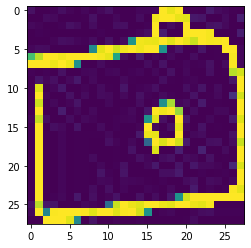

In [ ]:
test = cv2.imread("test.jpg")
test = cv2.cvtColor(test,cv2.COLOR_BGR2GRAY)
plt.imshow(test)
test = test.astype("float32")/255.0
test = test.reshape(28,28,1)
test = np.expand_dims(test,axis=0)
print(test.shape)

 camera


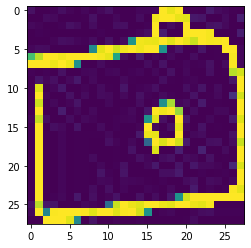

In [ ]:
# test = np.expand_dims(x_test[random.randint(0,len(x_test))], axis=0)
# test = x_test[random.randint(0,len(x_test))]
s = model.predict(test)
plt.imshow(test.reshape(28,28))
result = np.argmax(s)
print(classes[result][:-9])
